In [1]:
# Loading the dataset
import pandas as pd

# Path to the uploaded file
file_path = "master_final.csv"

# Reading the CSV file
data = pd.read_csv(file_path)

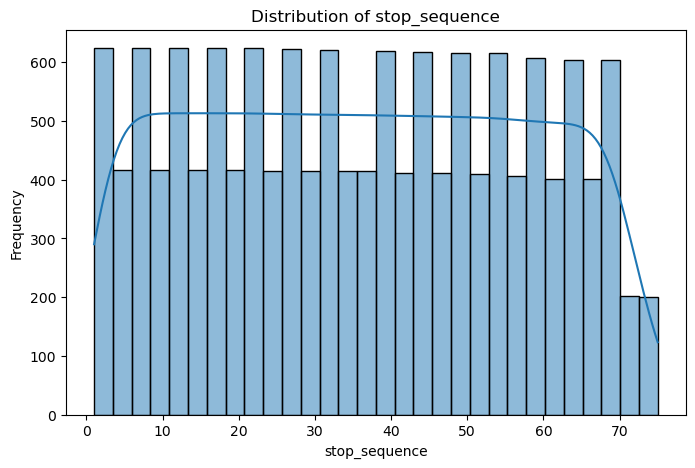

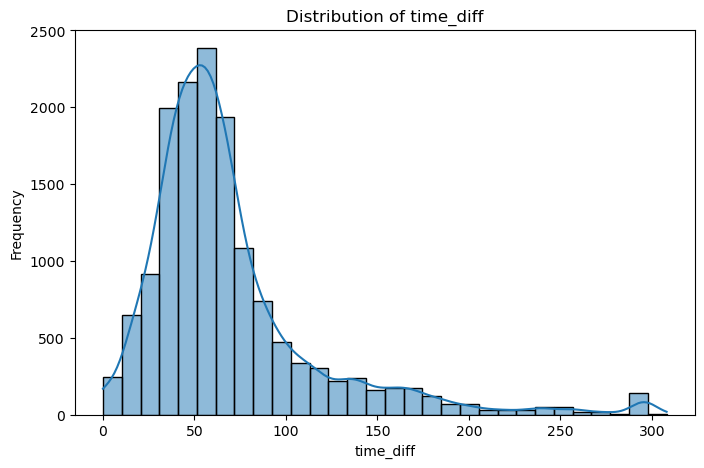

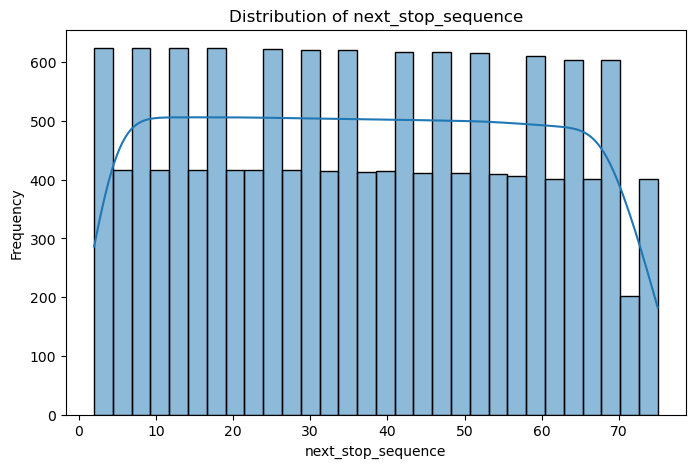

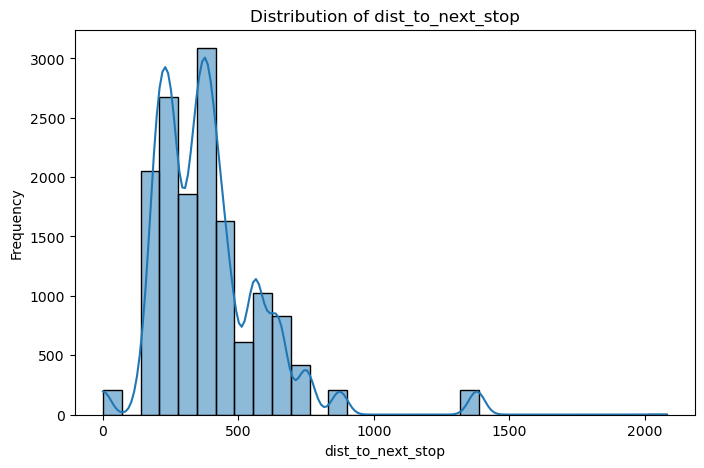

(          Unnamed: 0                        trip_id  stop_sequence  \
 count   14812.000000                          14812   14812.000000   
 unique           NaN                            208            NaN   
 top              NaN  4921.y1001.60-145-b12-1.325.I            NaN   
 freq             NaN                             73            NaN   
 mean     7405.500000                            NaN      36.292938   
 std      4276.000429                            NaN      20.791226   
 min         0.000000                            NaN       1.000000   
 25%      3702.750000                            NaN      18.000000   
 50%      7405.500000                            NaN      36.000000   
 75%     11108.250000                            NaN      54.000000   
 max     14811.000000                            NaN      75.000000   
 
        arrival_time_new day_of_the_week time_category     time_diff  \
 count             14812           14812         14812  14812.000000   
 u

In [2]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = data.describe(include='all')

# Checking for missing values
missing_values = data.isnull().sum()

# Plotting distributions of numerical features
numerical_features = ['stop_sequence', 'time_diff', 'next_stop_sequence', 'dist_to_next_stop']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Summary statistics and missing values
summary_stats, missing_values


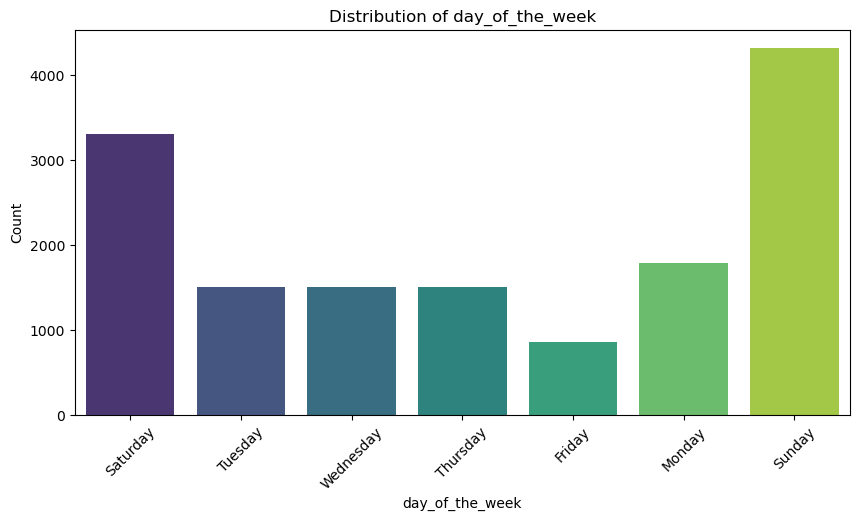

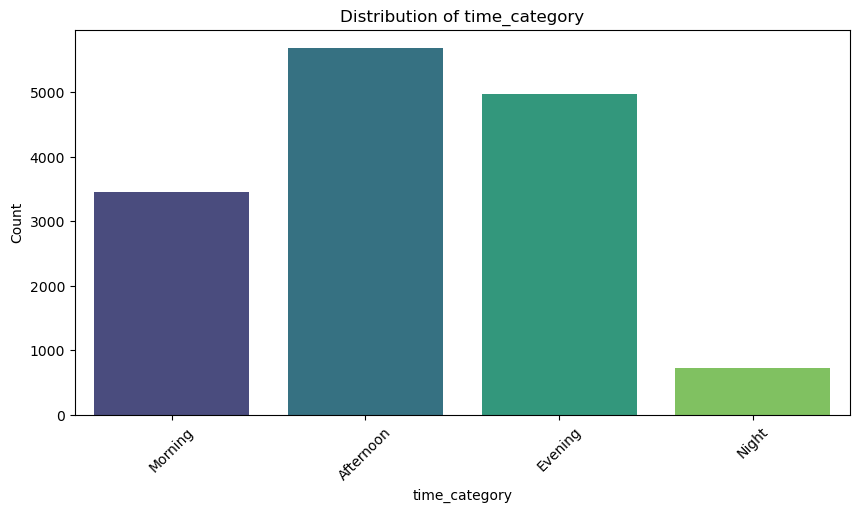

In [3]:
# Plotting distributions of categorical features
categorical_features = ['day_of_the_week', 'time_category']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

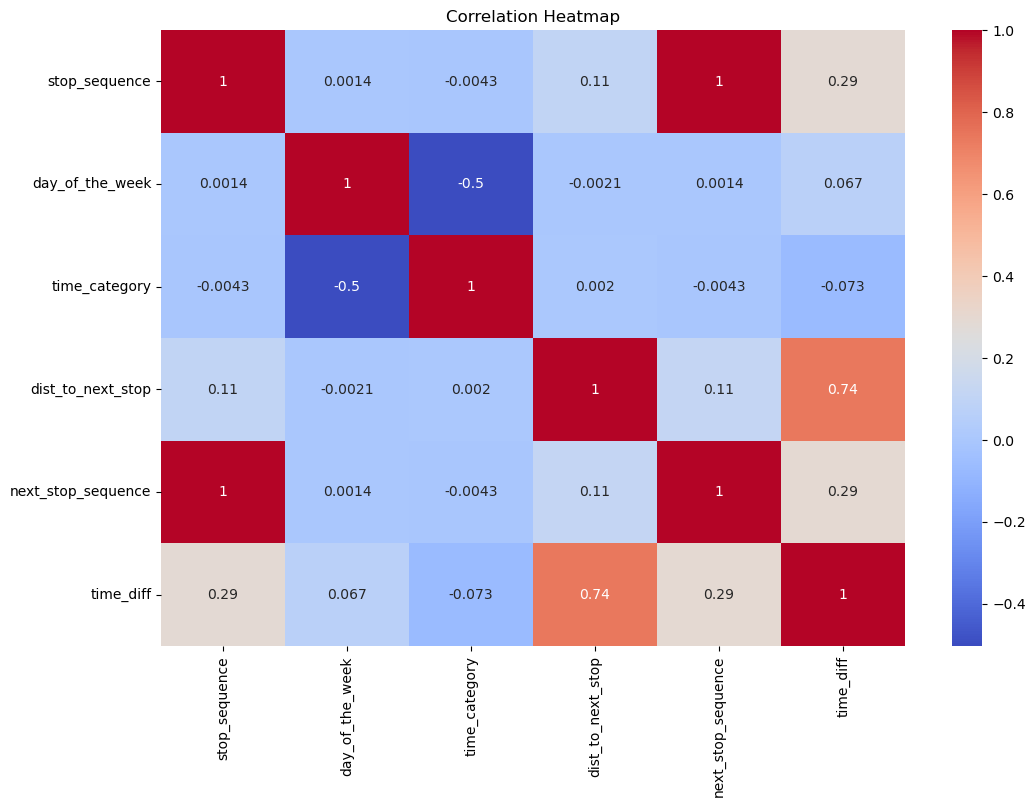

In [4]:
# Encoding the categorical features for correlation analysis
data_encoded = data.copy()
data_encoded['day_of_the_week'] = data_encoded['day_of_the_week'].astype('category').cat.codes
data_encoded['time_category'] = data_encoded['time_category'].astype('category').cat.codes

# Selecting relevant features for correlation analysis
correlation_features = [
    'stop_sequence', 'day_of_the_week', 'time_category', 'dist_to_next_stop',
    'next_stop_sequence', 'time_diff'
]

# Calculating the correlation matrix
correlation_matrix = data_encoded[correlation_features].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()